In [1]:
import matplotlib.pyplot as plt  
import csv 
import operator 
import datetime as dt  
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np


!pip install pandas_profiling
import pandas_profiling as pp

!pip install imblearn
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib import font_manager, rc
import platform
sns.set(style='whitegrid', palette='muted')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
import missingno as msno


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10


In [5]:

f = pd.read_excel('corona.xlsx')


In [7]:
f

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.000,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.000,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12664,ZWE,Zimbabwe,2020-04-19,25,1,3,0,1.682,0.067,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12665,ZWE,Zimbabwe,2020-04-20,25,0,3,0,1.682,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12666,ZWE,Zimbabwe,2020-04-21,25,0,3,0,1.682,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
12667,ZWE,Zimbabwe,2020-04-22,28,3,3,0,1.884,0.202,0.202,0.0,NaN,NaN,NaN,NaN,NaN


In [22]:
f_china = f[f.location=='China']
f_china

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
2243,CHN,China,2019-12-31,27,27,0,0,0.019,0.019,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2244,CHN,China,2020-01-01,27,0,0,0,0.019,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2245,CHN,China,2020-01-02,27,0,0,0,0.019,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2246,CHN,China,2020-01-03,44,17,0,0,0.031,0.012,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2247,CHN,China,2020-01-04,44,0,0,0,0.031,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,CHN,China,2020-04-19,83803,18,4636,0,58.224,0.013,3.221,0.0,NaN,NaN,NaN,NaN,NaN
2354,CHN,China,2020-04-20,83817,14,4636,0,58.234,0.010,3.221,0.0,NaN,NaN,NaN,NaN,NaN
2355,CHN,China,2020-04-21,83849,32,4636,0,58.256,0.022,3.221,0.0,NaN,NaN,NaN,NaN,NaN
2356,CHN,China,2020-04-22,83864,15,4636,0,58.266,0.010,3.221,0.0,NaN,NaN,NaN,NaN,NaN


In [29]:
f.location.value_counts()

Czech Republic           115
Sweden                   115
South Korea              115
Netherlands              115
Canada                   115
                        ... 
Falkland Islands          20
South Sudan               18
Sao Tome and Principe     15
Yemen                     14
Hong Kong                  4
Name: location, Length: 206, dtype: int64

In [33]:
f_korea = f[f.location=='South Korea']
f_korea

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
6770,KOR,South Korea,2019-12-31,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
6771,KOR,South Korea,2020-01-01,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
6772,KOR,South Korea,2020-01-02,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
6773,KOR,South Korea,2020-01-03,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
6774,KOR,South Korea,2020-01-04,0,0,0,0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,KOR,South Korea,2020-04-19,10661,8,234,2,207.942,0.156,4.564,0.039,559109.0,4275.0,10.855,0.083,cases tested
6881,KOR,South Korea,2020-04-20,10674,13,236,2,208.195,0.254,4.603,0.039,563035.0,3926.0,10.931,0.076,cases tested
6882,KOR,South Korea,2020-04-21,10683,9,237,1,208.371,0.176,4.623,0.020,571014.0,7979.0,11.086,0.155,cases tested
6883,KOR,South Korea,2020-04-22,10694,11,238,1,208.585,0.215,4.642,0.020,577959.0,6945.0,11.221,0.135,cases tested


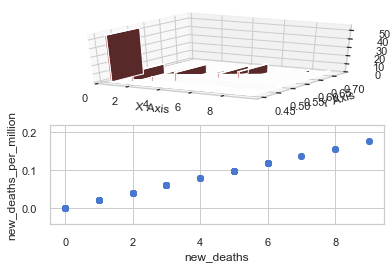

In [153]:


x = f_korea['new_deaths']
y = f_korea['new_deaths_per_million']
z = f_korea['new_cases']

fig.set_size_inches(20, 20)
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')

# compute two-dimensional histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=90)

# compute location of the x,y bar positions
elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = np.meshgrid(xedges[:-1]+.45, yedges[:-1]+.45)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)

# make every bar the same width in base
dx = .1 * np.ones_like(zpos)
dy = dx.copy()

# this defines the height of the bar
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='r', alpha=1)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# plot the same x,y correlation in scatter plot 
# for comparison
ax2 = fig.add_subplot(212)
ax2.scatter(x, y)
ax2.set_xlabel('new_deaths')
ax2.set_ylabel('new_deaths_per_million')

plt.show()

In [97]:
f_korea.date

6770   2019-12-31
6771   2020-01-01
6772   2020-01-02
6773   2020-01-03
6774   2020-01-04
          ...    
6880   2020-04-19
6881   2020-04-20
6882   2020-04-21
6883   2020-04-22
6884   2020-04-23
Name: date, Length: 115, dtype: datetime64[ns]

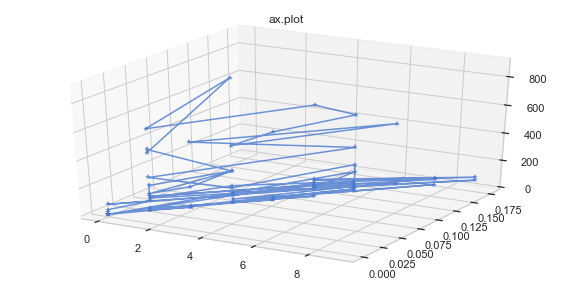

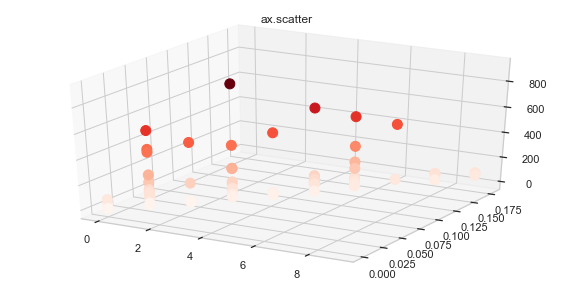

In [152]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x = f_korea['new_deaths']
y = f_korea['new_deaths_per_million']
z = f_korea['new_cases']
ax.plot(x, y, z, alpha=0.8, marker='*')

plt.title("ax.plot")
plt.show()

# scattering 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 500
x = f_korea['new_deaths']
y = f_korea['new_deaths_per_million']
z = f_korea['new_cases']
ax.scatter(x, y, z, c = z, s= 100, alpha=1, cmap=plt.cm.Reds)

plt.title("ax.scatter")
plt.show()


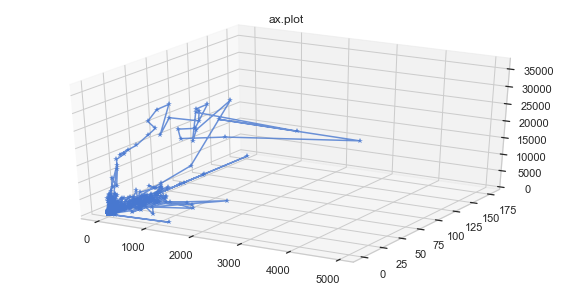

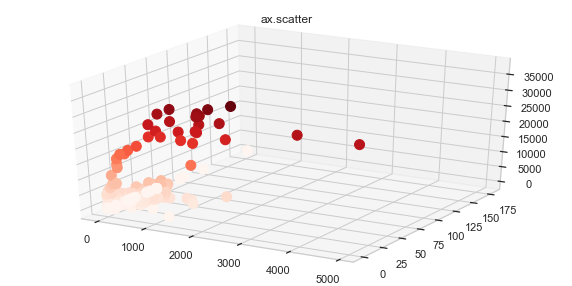

In [154]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x = f['new_deaths']
y = f['new_deaths_per_million']
z = f['new_cases']
ax.plot(x, y, z, alpha=0.8, marker='*')

plt.title("ax.plot")
plt.show()

# scattering 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 500
x = f['new_deaths']
y = f['new_deaths_per_million']
z = f['new_cases']
ax.scatter(x, y, z, c = z, s= 100, alpha=1, cmap=plt.cm.Reds)

plt.title("ax.scatter")
plt.show()


In [156]:
f.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units'],
      dtype='object')

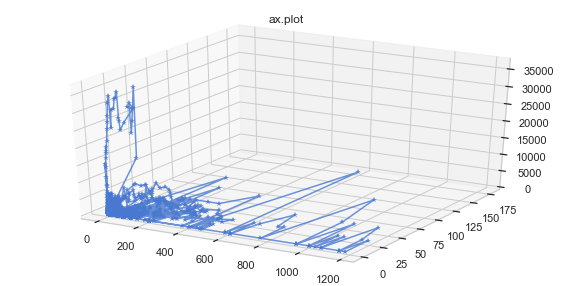

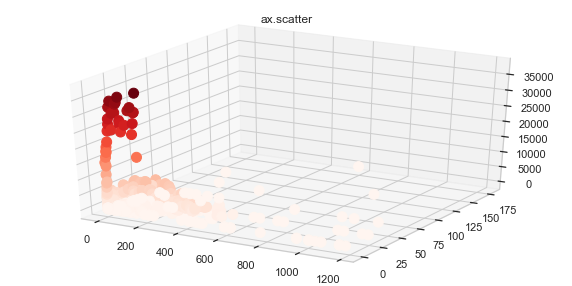

In [158]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x = f['total_deaths_per_million']
y = f['new_deaths_per_million']
z = f['new_cases']
ax.plot(x, y, z, alpha=0.8, marker='*')

plt.title("ax.plot")
plt.show()

# scattering 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 500

x = f['total_deaths_per_million']
y = f['new_deaths_per_million']
z = f['new_cases']
ax.scatter(x, y, z, c = z, s= 100, alpha=1, cmap=plt.cm.Reds)

plt.title("ax.scatter")
plt.show()


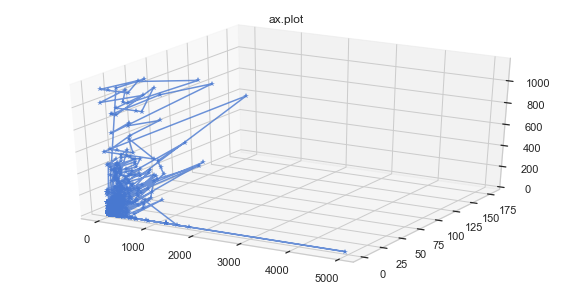

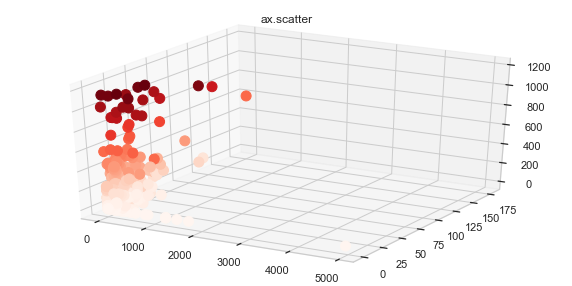

In [162]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

x = f['new_cases_per_million']
y = f['new_deaths_per_million']
z = f['total_deaths_per_million']
ax.plot(x, y, z, alpha=0.8, marker='*')

plt.title("ax.plot")
plt.show()

# scattering 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 500

x = f['new_cases_per_million']
y = f['new_deaths_per_million']
z = f['total_deaths_per_million']
ax.scatter(x, y, z, c = z, s= 100, alpha=1, cmap=plt.cm.Reds)

plt.title("ax.scatter")
plt.show()
